# Figure 2: Mutational composition of the final populations

After the final populations were sequenced, we summarized the mutations impacting genes or nearby regulatory elements observed in our populations with a decorated heatmap. Each mutation type was color coded together with other samples annotations. The mutations were ordered by prevalence. 


In [8]:
#Libraries
library("tidyverse")
library("ComplexHeatmap")

source("../r/eefe_functions.R")

In [7]:
#Read and prepare the data
data=read.csv("../../data/mutations_populations.csv")
data = data %>% arrange(Population)
data = data %>% mutate(Strain = str_extract(Population,'[0-9][0-9][0-9]'))

## Prepare the OncoPrint input
prepared = data %>% group_by(.dots=c("Population","Gene")) %>% mutate(collapsed=paste(Class, collapse = ';'))
prepared = prepared %>% select(Gene, Population, collapsed)
prepared = prepared %>% distinct()
oncomat = prepared %>% spread(Population,collapsed,fill="",drop=FALSE)
## Prepare the matrix
mat=as.matrix(oncomat)
rownames(mat) = mat[,1]
mat = mat[, -1]
#Order the matrix
logimat=!(mat == "")
#mat=mat[order(rowSums(logimat),decreasing=T),]
#Save the mutation
prepared$state="1"
mut_mat = prepared %>% spread(Population,state,fill="0",drop=FALSE)
mut_mat

Gene,collapsed,F606-1,F606-2,F606-3,F606-4,F607-1,F607-2,F607-3,F607-4,⋯,R607-3,R607-4,S606-1,S606-2,S606-3,S606-4,S607-1,S607-2,S607-3,S607-4
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
araB,Intergenic_snp,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Intergenic_snp;Intergenic_snp,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Large_amplification,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Large_deletion,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Non_Synonymous,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Non_Synonymous;Large_amplification,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Non_Synonymous;Non_Synonymous,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Non_Synonymous;Non_Synonymous;Non_Synonymous,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
araB,Small_indel,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


In [47]:
#Get the populations information
pheno = read.csv("pheno.csv")
Environment=pheno$Environment
Linage = pheno$Linage
ha = HeatmapAnnotation(Environment = Environment, Linage= Linage,
                       col = list(Environment = c("Fast" = "cornflowerblue", "Random" = "indianred1","Slow"="mediumseagreen"),
                                 Linage = c("606"='#FFCC00',"607"='#66CC00')),
                       annotation_height = unit(c(5, 5, 15), "mm"),
                       annotation_legend_param = list(legend_position = "bottom",Environment = list(title = "Environment"),Linage = list(title = "Linage")))

All mutation types: Non_Synonymous, Intergenic_snp, Small_indel,
Large_deletion, Large_amplification, Synonymous, Stop


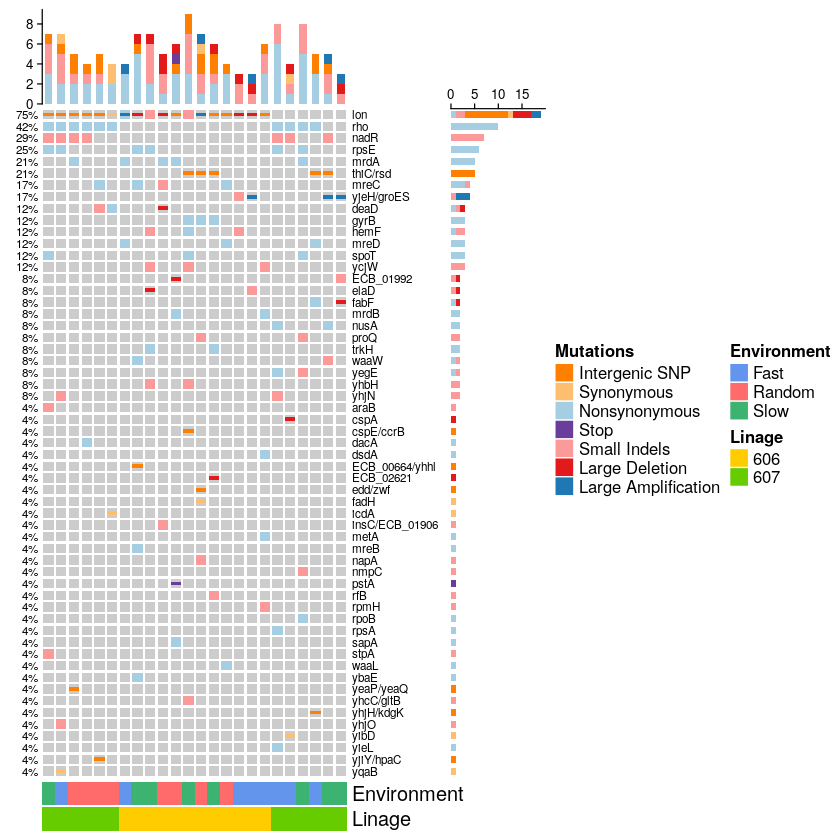

In [52]:
#OncoPrint
#pdf("mutational_signature.pdf")
oncoPrint(mat, get_type = function(x) strsplit(x, ";")[[1]],
               alter_fun = alter_fun, col = col, remove_empty_columns = TRUE,
               row_names_gp = gpar(fontsize = 7),
               heatmap_legend_param = list(title = "Mutations", at = c("Intergenic_snp",'Synonymous',"Non_Synonymous", 'Stop', "Small_indel" ,
              'Large_deletion',"Large_amplification") , 
                                           labels = c("Intergenic SNP",'Synonymous',"Nonsynonymous",'Stop', "Small Indels",'Large Deletion','Large Amplification')),
                bottom_annotation = ha,pct_gp = gpar(fontsize = 7),
          split = sample(c("606","607"), nrow(mat), replace = TRUE),column_order=NULL
)
#dev.off()


In [6]:
#Read and prepare the data
data=read.csv("mutations_populations.csv")

In [7]:
table(data$Gene)


          araB           cspA      cspE/ccrB           dacA           deaD 
             1              1              1              1              4 
          dsdA ECB_00664/yhhl      ECB_01992      ECB_02621        edd/zwf 
             1              1              2              1              1 
          elaD           fabF           fadH           gyrB           hemF 
             2              2              1              3              3 
          icdA insC/ECB_01906            lon           metA           mrdA 
             1              1             20              1              7 
          mrdB           mreB           mreC           mreD           nadR 
             2              1              5              4              7 
          napA           nmpC           nusA           proQ           pstA 
             1              1              4              2              1 
           rfB            rho           rpmH           rpoB           rpsA 
           

In [8]:
data %>% filter(Gene=="rpsE")

Identifier,Gene,Mutation,Class,AF,Population
<int>,<fct>,<fct>,<fct>,<dbl>,<fct>
5,rpsE,G91C,Non_Synonymous,65.0,S607-3
6,rpsE,G91C,Non_Synonymous,44.3,S607-4
24,rpsE,G91S,Non_Synonymous,35.1,S606-3
25,rpsE,G91A,Non_Synonymous,93.6,S606-4
61,rpsE,C112S,Non_Synonymous,59.2,F607-2
62,rpsE,C112S,Non_Synonymous,21.8,F607-3
63,rpsE,G91S,Non_Synonymous,12.4,F607-3


In [9]:
library(RColorBrewer)

In [14]:
# Hexadecimal color specification 
brewer.pal(n = 12, name = "Paired")

[1] "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99" "#E31A1C" "#FDBF6F"
 [8] "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"

In [24]:
data$Population

[1] S607-3 S607-4 S607-4 S607-4 S607-3 S607-4 S607-1 S607-1 S607-1 S607-3
 [11] S607-4 S607-3 S607-4 S607-3 S607-4 S607-3 S607-1 S607-3 S607-4 S607-4
 [21] S607-2 S607-1 S607-1 S606-3 S606-4 S606-2 S606-3 S606-2 S606-3 S606-3
 [31] S606-1 S606-2 S606-4 S606-2 S606-2 S606-3 S606-2 S606-2 S606-1 S606-3
 [41] S606-1 S606-4 S606-4 S606-4 S606-1 S606-2 S606-1 S606-2 S606-1 S606-4
 [51] S606-4 F607-3 F607-1 F607-2 F607-3 F607-4 F607-3 F607-2 F607-3 F607-3
 [61] F607-2 F607-3 F607-3 F607-3 F607-2 F607-1 F607-1 F607-2 F607-3 F607-2
 [71] F607-2 F607-4 F607-3 F607-1 F607-1 F607-2 F607-3 F607-4 F606-1 F606-4
 [81] F606-2 F606-3 F606-1 F606-1 F606-2 F606-4 F606-2 F606-1 F606-1 F606-3
 [91] F606-3 F606-1 F606-3 F606-1 R607-1 R607-1 R607-2 R607-3 R607-4 R607-2
[101] R607-1 R607-3 R607-4 R607-2 R607-2 R607-3 R607-4 R607-1 R607-3 R607-3
[111] R607-2 R607-1 R607-4 R607-4 R606-1 R606-2 R606-3 R606-4 R606-1 R606-2
[121] R606-2 R606-3 R606-4 R606-4 R606-1 R606-2 R606-3 R606-4 R606-4 R606-1
[131] R606-2 R606-2 R606-3 R606-4 R606-1 R606-3 R606-3 R606-3 R606-2 F606-3
[141] F606-4 F607-4 S606-3 S607-2 S607-1 S607-2
24 Levels: F606-1 F606-2 F606-3 F606-4 F607-1 F607-2 F607-3 F607-4 ... S607-4